In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sy
np.set_printoptions(precision=4)

In [3]:
skew = lambda x: np.array([[0, -x[2], x[1]],
                    [x[2], 0, -x[0]],
                    [-x[1], x[0], 0]])

In [114]:
g = 9.81
x, y = sy.symbols('x y') 
M = y**2 / 10**2
Mlam = sy.lambdify((x,y), M)
Mx = sy.lambdify((x,y), sy.diff(M, x))
My = sy.lambdify((x,y), sy.diff(M, y))

# make_q = lambda nhat, n:

[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
[0. 1. 0.] [[ 0. -0.  0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]


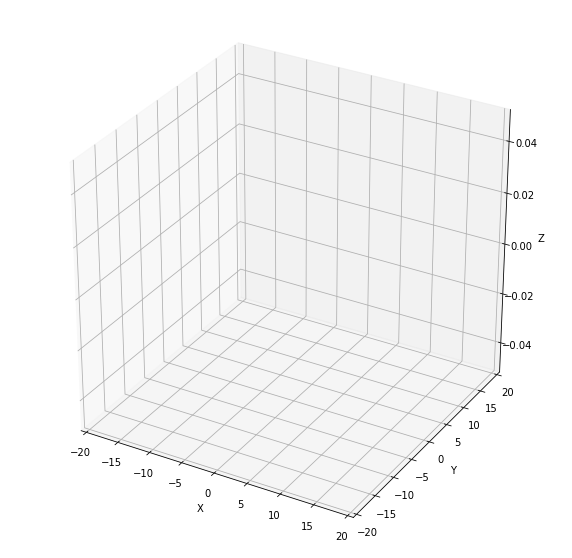

In [130]:
def system(y, t):
    i = 0
    p = y[0:3]
    v = y[3:6]
    R = y[6:].reshape((3,3))
    
    #calculate normal vector
    px = np.array([1,0,Mx(p[0], p[1])])
    py = np.array([0,1,My(p[0], p[1])])
    n = np.cross(px, py)
    nhat = n / np.linalg.norm(n)
    
    

    
    
    #find angle + vdot
    vhat = v / np.linalg.norm(v)
    angle = np.arccos(nhat[2])
    vdot = np.array([0,0,-g]) + g*nhat*np.cos(angle) #+ R@np.array([u[i],0,0])
    
    
    #find q and rRot 
    q = vdot[2] / (nhat[2])
    wb = np.array([0, q, theta[i]])
    Rdot = R@skew(wb)
        
    #make p dot
    pdot = v
    
    #make v dot
    return tuple(pdot) + tuple(vdot) + tuple(Rdot.flatten())

N = 100
theta = np.zeros(N)
u = np.zeros(N)
t_array = np.linspace(0, 20, N)

p0 = np.zeros(3)
v0 = np.zeros(3)
v0[1] = 1 
theta0 = np.pi/2
R0 = np.array([[np.cos(theta0), -np.sin(theta0), 0],
              [np.sin(theta0), np.cos(theta0), 0],
              [0, 0, 1]])
y0 = np.concatenate((p0, v0, R0.flatten()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

sol = odeint(system, y0, t_array)
ax.plot(sol[:,0], sol[:,1], sol[:,2])

x = np.linspace(-10,10)
y = np.linspace(-10,10)
X,Y = np.meshgrid(x,y)

# ax.plot_surface(X,Y,Mlam(X,Y))
ax.set_ylim([-20,20])
ax.set_xlim([-20,20])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# # plt.savefig('HW3_2.png')
plt.show()